<a href="https://colab.research.google.com/github/Subhranshu-123/BIKE2/blob/main/ridge_regressiuon_in_wine(subhranshu_sekhar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error, r2_score

In [3]:
white_df = pd.read_csv('/winequality-white.csv', sep=";")

In [4]:
red_df=pd.read_csv('/winequality-white.csv')

In [5]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
red_df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [7]:
white_df["is_red"] = 0

In [8]:
white_df = white_df.drop_duplicates(keep='first')

In [9]:
print(white_df.alcohol[0])
print(white_df.alcohol[100])

8.8
9.1


In [10]:
red_df = red_df.drop_duplicates(keep='first')

In [15]:
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
red_df = pd.read_csv(URL, sep=";")
red_df["is_red"] = 1
print(red_df.alcohol[0])
print(red_df.alcohol[100])

9.4
10.2


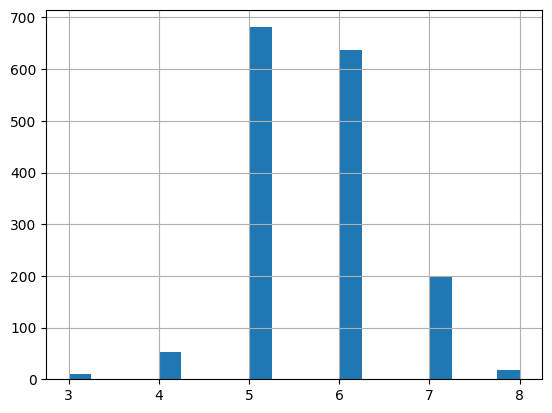

In [16]:
red_df['quality'].hist(bins=20);

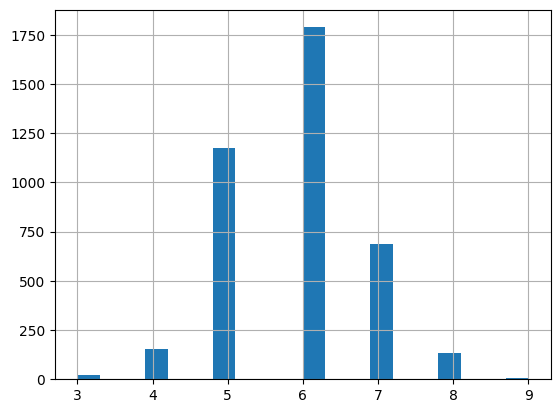

In [17]:
white_df['quality'].hist(bins=20);

In [18]:
df = pd.concat([red_df, white_df], ignore_index=True)
df = df[(df['quality'] > 4) & (df['quality'] < 8)]


In [19]:
print(df.alcohol[0])
print(df.alcohol[100])

9.4
10.2


In [20]:
df = df.reset_index(drop=True)

In [21]:
train, test = train_test_split(df, test_size=0.2, random_state = 1)

In [22]:
train, val = train_test_split(train, test_size=0.2, random_state = 1)

In [23]:
train_stats = train.describe()
train_stats.pop('is_red')
train_stats.pop('quality')
train_stats = train_stats.transpose()

In [24]:
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3308.0,7.275695,1.374416,3.80000,6.4000,7.00000,7.80000,15.90000
volatile acidity,3308.0,0.347969,0.166046,0.08000,0.2300,0.30000,0.42000,1.33000
citric acid,3308.0,0.319105,0.148603,0.00000,0.2400,0.31000,0.40000,1.23000
residual sugar,3308.0,5.022400,4.468909,0.60000,1.8000,2.60000,7.50000,26.05000
chlorides,3308.0,0.058336,0.037493,0.00900,0.0380,0.04800,0.07100,0.61100
free sulfur dioxide,3308.0,29.792019,17.235078,1.00000,16.0000,28.00000,41.00000,131.00000
total sulfur dioxide,3308.0,112.554716,57.569862,6.00000,68.0000,116.00000,153.00000,344.00000
density,3308.0,0.994701,0.002911,0.98722,0.9924,0.99494,0.99691,1.00369
pH,3308.0,3.227666,0.157863,2.74000,3.1200,3.22000,3.33000,4.01000
sulphates,3308.0,0.537914,0.147697,0.22000,0.4400,0.52000,0.61000,1.95000


In [25]:
type(train_stats)

pandas.core.frame.DataFrame

In [26]:
train_stats.to_pickle("train_stats")

In [27]:
train_stats['mean']

,mean
fixed acidity,7.275695
volatile acidity,0.347969
citric acid,0.319105
residual sugar,5.022400
chlorides,0.058336
free sulfur dioxide,29.792019
total sulfur dioxide,112.554716
density,0.994701
pH,3.227666
sulphates,0.537914


In [28]:
train_stats['std']

,std
fixed acidity,1.374416
volatile acidity,0.166046
citric acid,0.148603
residual sugar,4.468909
chlorides,0.037493
free sulfur dioxide,17.235078
total sulfur dioxide,57.569862
density,0.002911
pH,0.157863
sulphates,0.147697


In [38]:
def format_output(data):
    is_red = data.pop('is_red')
    is_red = np.array(is_red)
    quality = data.pop('quality')
    quality = np.array(quality)
    return quality

In [30]:
# format the output of the train set
train_Y = format_output(train)

# format the output of the val set
val_Y = format_output(val)

# format the output of the test set
test_Y = format_output(test)



In [31]:
train.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3186,8.9,0.24,0.33,15.75,0.035,16.0,132.0,0.99600,3.00,0.37,12.1
1234,7.2,0.53,0.14,2.10,0.064,15.0,29.0,0.99323,3.35,0.61,12.1
3375,8.3,0.25,0.33,2.50,0.053,12.0,72.0,0.99404,2.89,0.48,9.5
2342,6.2,0.55,0.45,12.00,0.049,27.0,186.0,0.99740,3.17,0.50,9.3
3590,6.8,0.17,0.36,1.40,0.036,38.0,108.0,0.99006,3.19,0.66,12.0


In [32]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [33]:

# normalize the train set
norm_train_X = norm(train)

# normalize the val set
norm_val_X = norm(val)

# normalize the test set
norm_test_X = norm(test)
print(norm_train_X.shape)
print(norm_val_X.shape)

(3308, 11)
(828, 11)


In [53]:
from sklearn.linear_model import LinearRegression
predictions = model.predict(norm_test_X)
quality_pred = predictions
#type_pred = predictions[1]

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [50]:
# format the output of the train set
#train_Y = format_output(train)

# format the output of the val set
#val_Y = format_output(val)

# format the output of the test set
#test_Y = format_output(test)

In [54]:
norm_test_X


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2971,-0.491623,-0.590010,0.275194,0.688669,-0.355680,1.404576,1.171538,0.377483,-0.935406,-0.798353,-1.124949
3831,-0.782656,0.072459,0.409781,-0.407795,-0.729081,-0.568145,-0.409150,-1.765859,-1.062098,-1.407710,1.265717
3066,-0.418865,-0.288888,0.880833,1.248090,-0.702410,1.520619,1.727384,0.789664,-0.048563,0.352654,-0.868806
3232,0.890781,-0.951356,1.621059,2.747337,-0.088964,0.998428,0.980466,1.981555,-0.998752,0.894304,-1.039568
2139,-0.491623,-0.830907,-0.061272,1.427104,-0.515709,0.940407,0.910985,1.115975,1.155010,-0.662940,-0.612663
...,...,...,...,...,...,...,...,...,...,...,...
3396,0.526991,-0.409336,0.006021,0.576785,-0.355680,1.810725,1.588423,0.250394,-0.808714,0.081829,-0.356520
1684,-0.346107,-1.011580,0.409781,-0.810578,-0.542380,0.302173,-0.027006,-0.996454,0.584897,0.352654,0.582670
1073,2.491461,0.313356,0.342488,-0.698694,0.604496,-0.742208,-1.451362,0.700359,-0.682022,0.758892,0.582670
3219,0.090442,-1.011580,-0.195858,-0.810578,-0.435694,0.244152,-0.200708,-0.295746,1.978507,0.420360,-0.014997


In [55]:
type(norm_test_X)

pandas.core.frame.DataFrame

In [56]:
norm_test_X.iloc[0]

,2971
fixed acidity,-0.491623
volatile acidity,-0.590010
citric acid,0.275194
residual sugar,0.688669
chlorides,-0.355680
free sulfur dioxide,1.404576
total sulfur dioxide,1.171538
density,0.377483
pH,-0.935406
sulphates,-0.798353


In [57]:
print(quality_pred[0])

-0.039646894


In [60]:
print(quality_pred[0])
#print(type_pred[100])

-0.039646894


In [69]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
count,5170.000000,5170.000000,5170.000000,5170.000000,5170.000000,5170.000000,5170.000000,5170.000000,5170.000000,5170.000000,5170.000000,5170.000000,5170.000000
mean,7.272002,0.347728,0.317284,4.985174,0.058168,29.621470,111.408801,0.994702,3.227894,0.540644,10.515502,5.812766,0.293617
std,1.364457,0.166299,0.148852,4.487155,0.036634,17.138174,57.445719,0.002969,0.159628,0.151173,1.162040,0.704126,0.455463
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,5.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,68.000000,0.992400,3.120000,0.440000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.600000,0.048000,28.000000,114.000000,0.994905,3.220000,0.520000,10.300000,6.000000,0.000000
75%,7.800000,0.420000,0.400000,7.400000,0.071000,40.875000,152.000000,0.996900,3.330000,0.610000,11.300000,6.000000,1.000000
max,15.900000,1.330000,1.660000,65.800000,0.611000,131.000000,344.000000,1.038980,4.010000,1.980000,14.900000,7.000000,1.000000


In [70]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,5170.0,7.272002,1.364457,3.80000,6.4000,7.000000,7.8000,15.90000
volatile acidity,5170.0,0.347728,0.166299,0.08000,0.2300,0.300000,0.4200,1.33000
citric acid,5170.0,0.317284,0.148852,0.00000,0.2400,0.310000,0.4000,1.66000
residual sugar,5170.0,4.985174,4.487155,0.60000,1.8000,2.600000,7.4000,65.80000
chlorides,5170.0,0.058168,0.036634,0.00900,0.0380,0.048000,0.0710,0.61100
free sulfur dioxide,5170.0,29.621470,17.138174,1.00000,16.0000,28.000000,40.8750,131.00000
total sulfur dioxide,5170.0,111.408801,57.445719,6.00000,68.0000,114.000000,152.0000,344.00000
density,5170.0,0.994702,0.002969,0.98711,0.9924,0.994905,0.9969,1.03898
pH,5170.0,3.227894,0.159628,2.72000,3.1200,3.220000,3.3300,4.01000
sulphates,5170.0,0.540644,0.151173,0.22000,0.4400,0.520000,0.6100,1.98000


In [71]:
df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [72]:
df.duplicated().sum()

np.int64(239)

In [73]:
df.drop_duplicates(inplace=True)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4931 entries, 0 to 5169
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4931 non-null   float64
 1   volatile acidity      4931 non-null   float64
 2   citric acid           4931 non-null   float64
 3   residual sugar        4931 non-null   float64
 4   chlorides             4931 non-null   float64
 5   free sulfur dioxide   4931 non-null   float64
 6   total sulfur dioxide  4931 non-null   float64
 7   density               4931 non-null   float64
 8   pH                    4931 non-null   float64
 9   sulphates             4931 non-null   float64
 10  alcohol               4931 non-null   float64
 11  quality               4931 non-null   int64  
 12  is_red                4931 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 539.3 KB


In [75]:
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [76]:
categorical_features.head()

""
0
1
2
3
5


In [77]:
numeric_features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


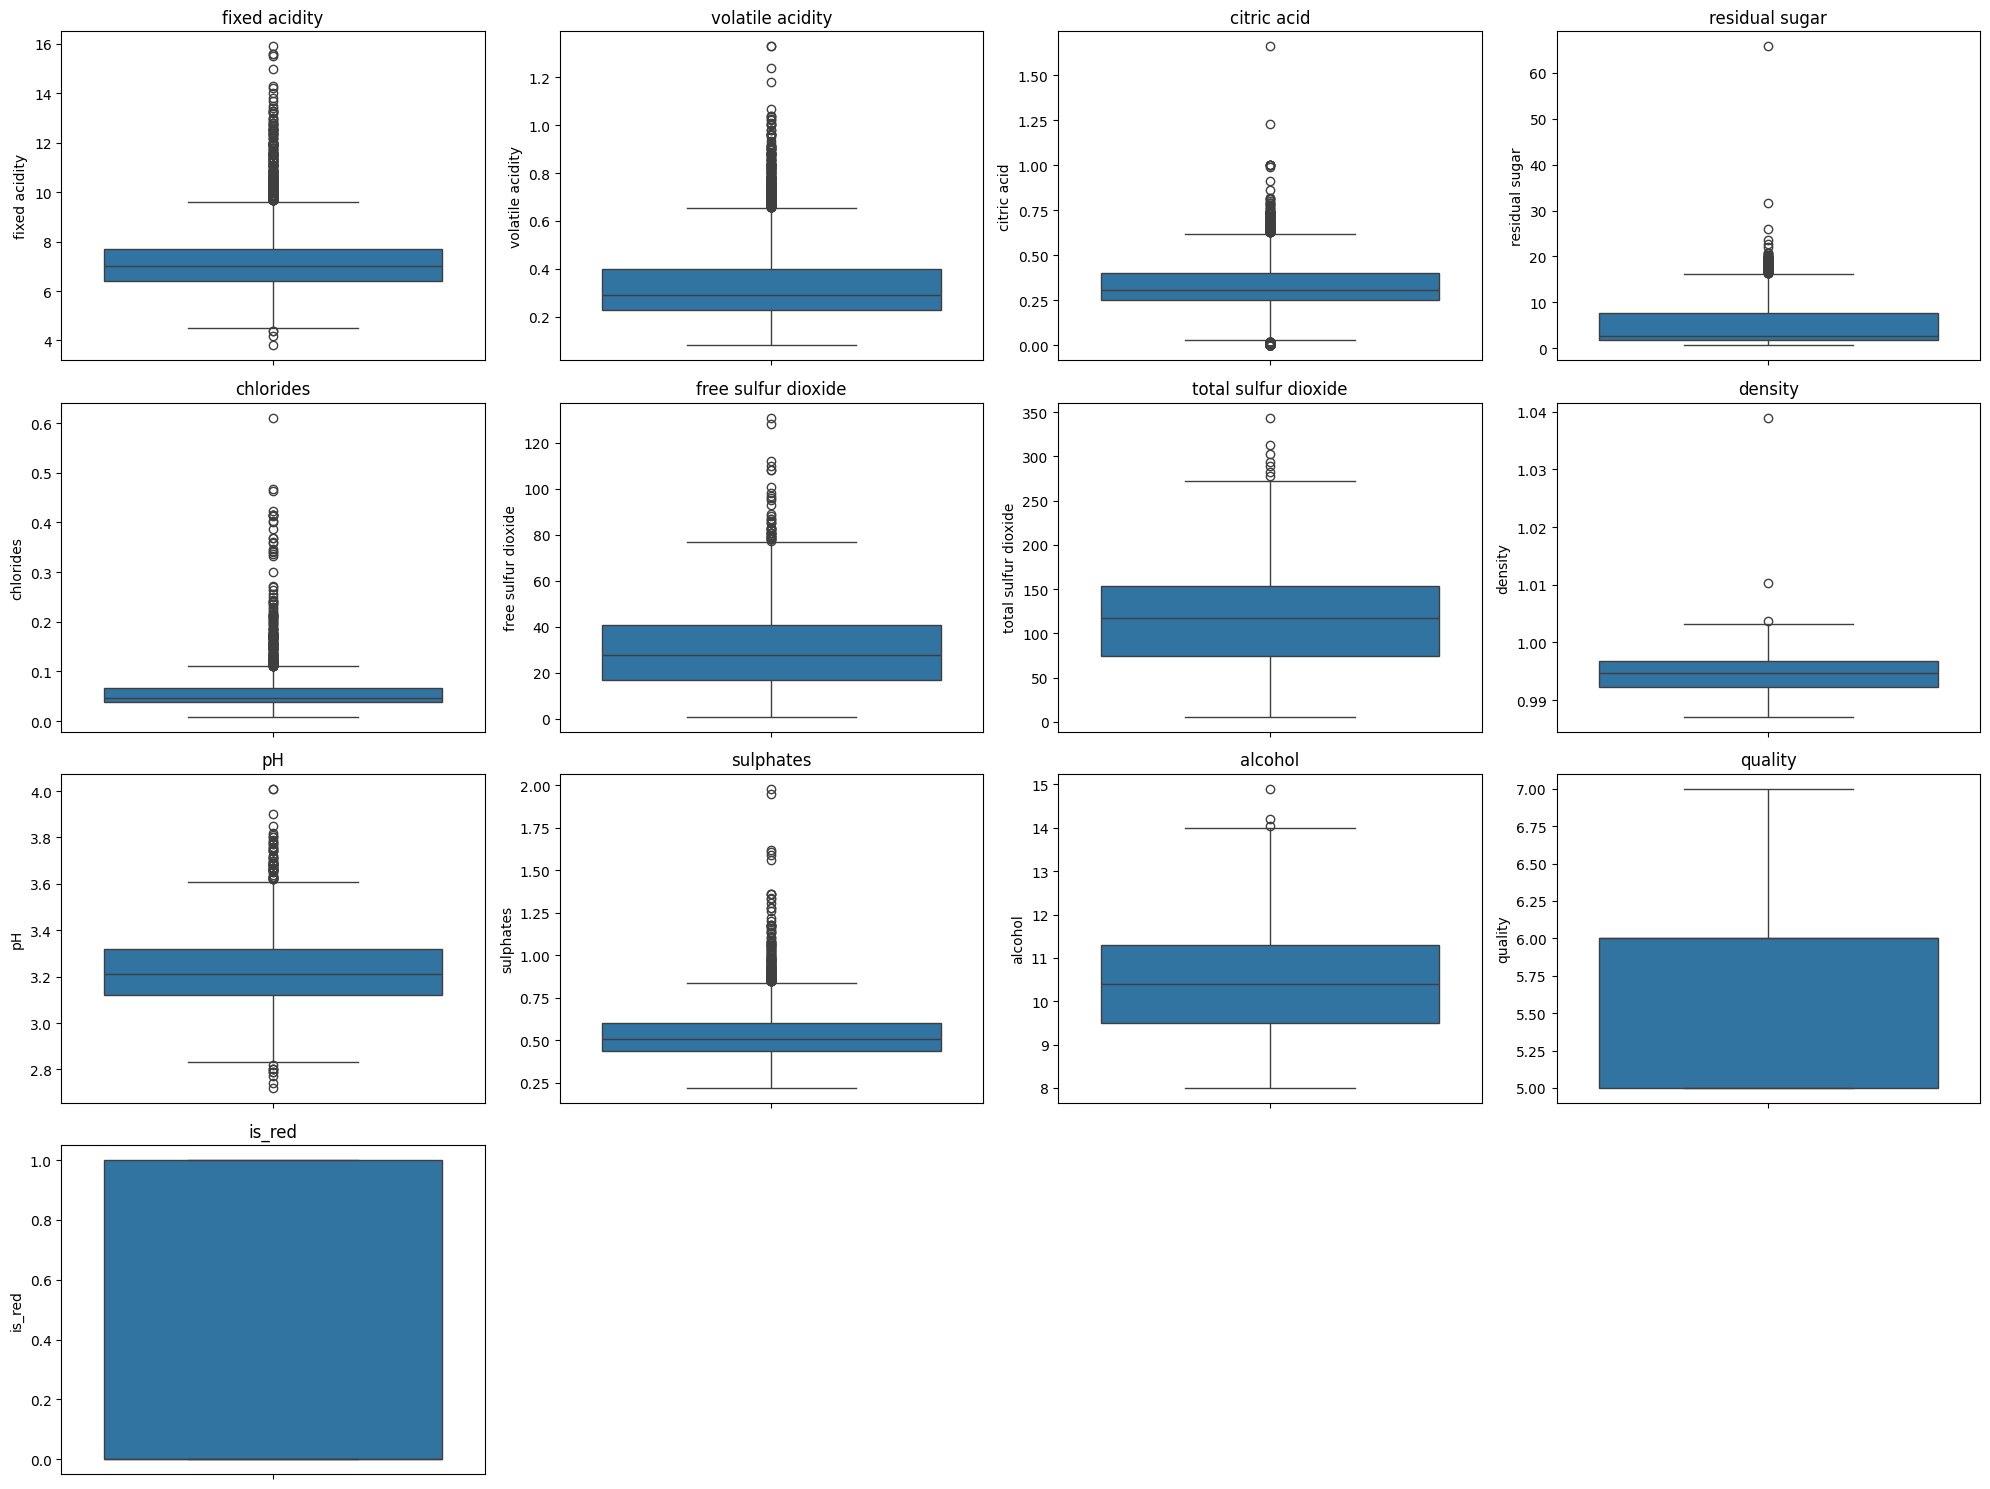

In [78]:
n = 1
plt.figure(figsize=(20,15))

for i in numeric_features.columns:
  plt.subplot(4,4,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()

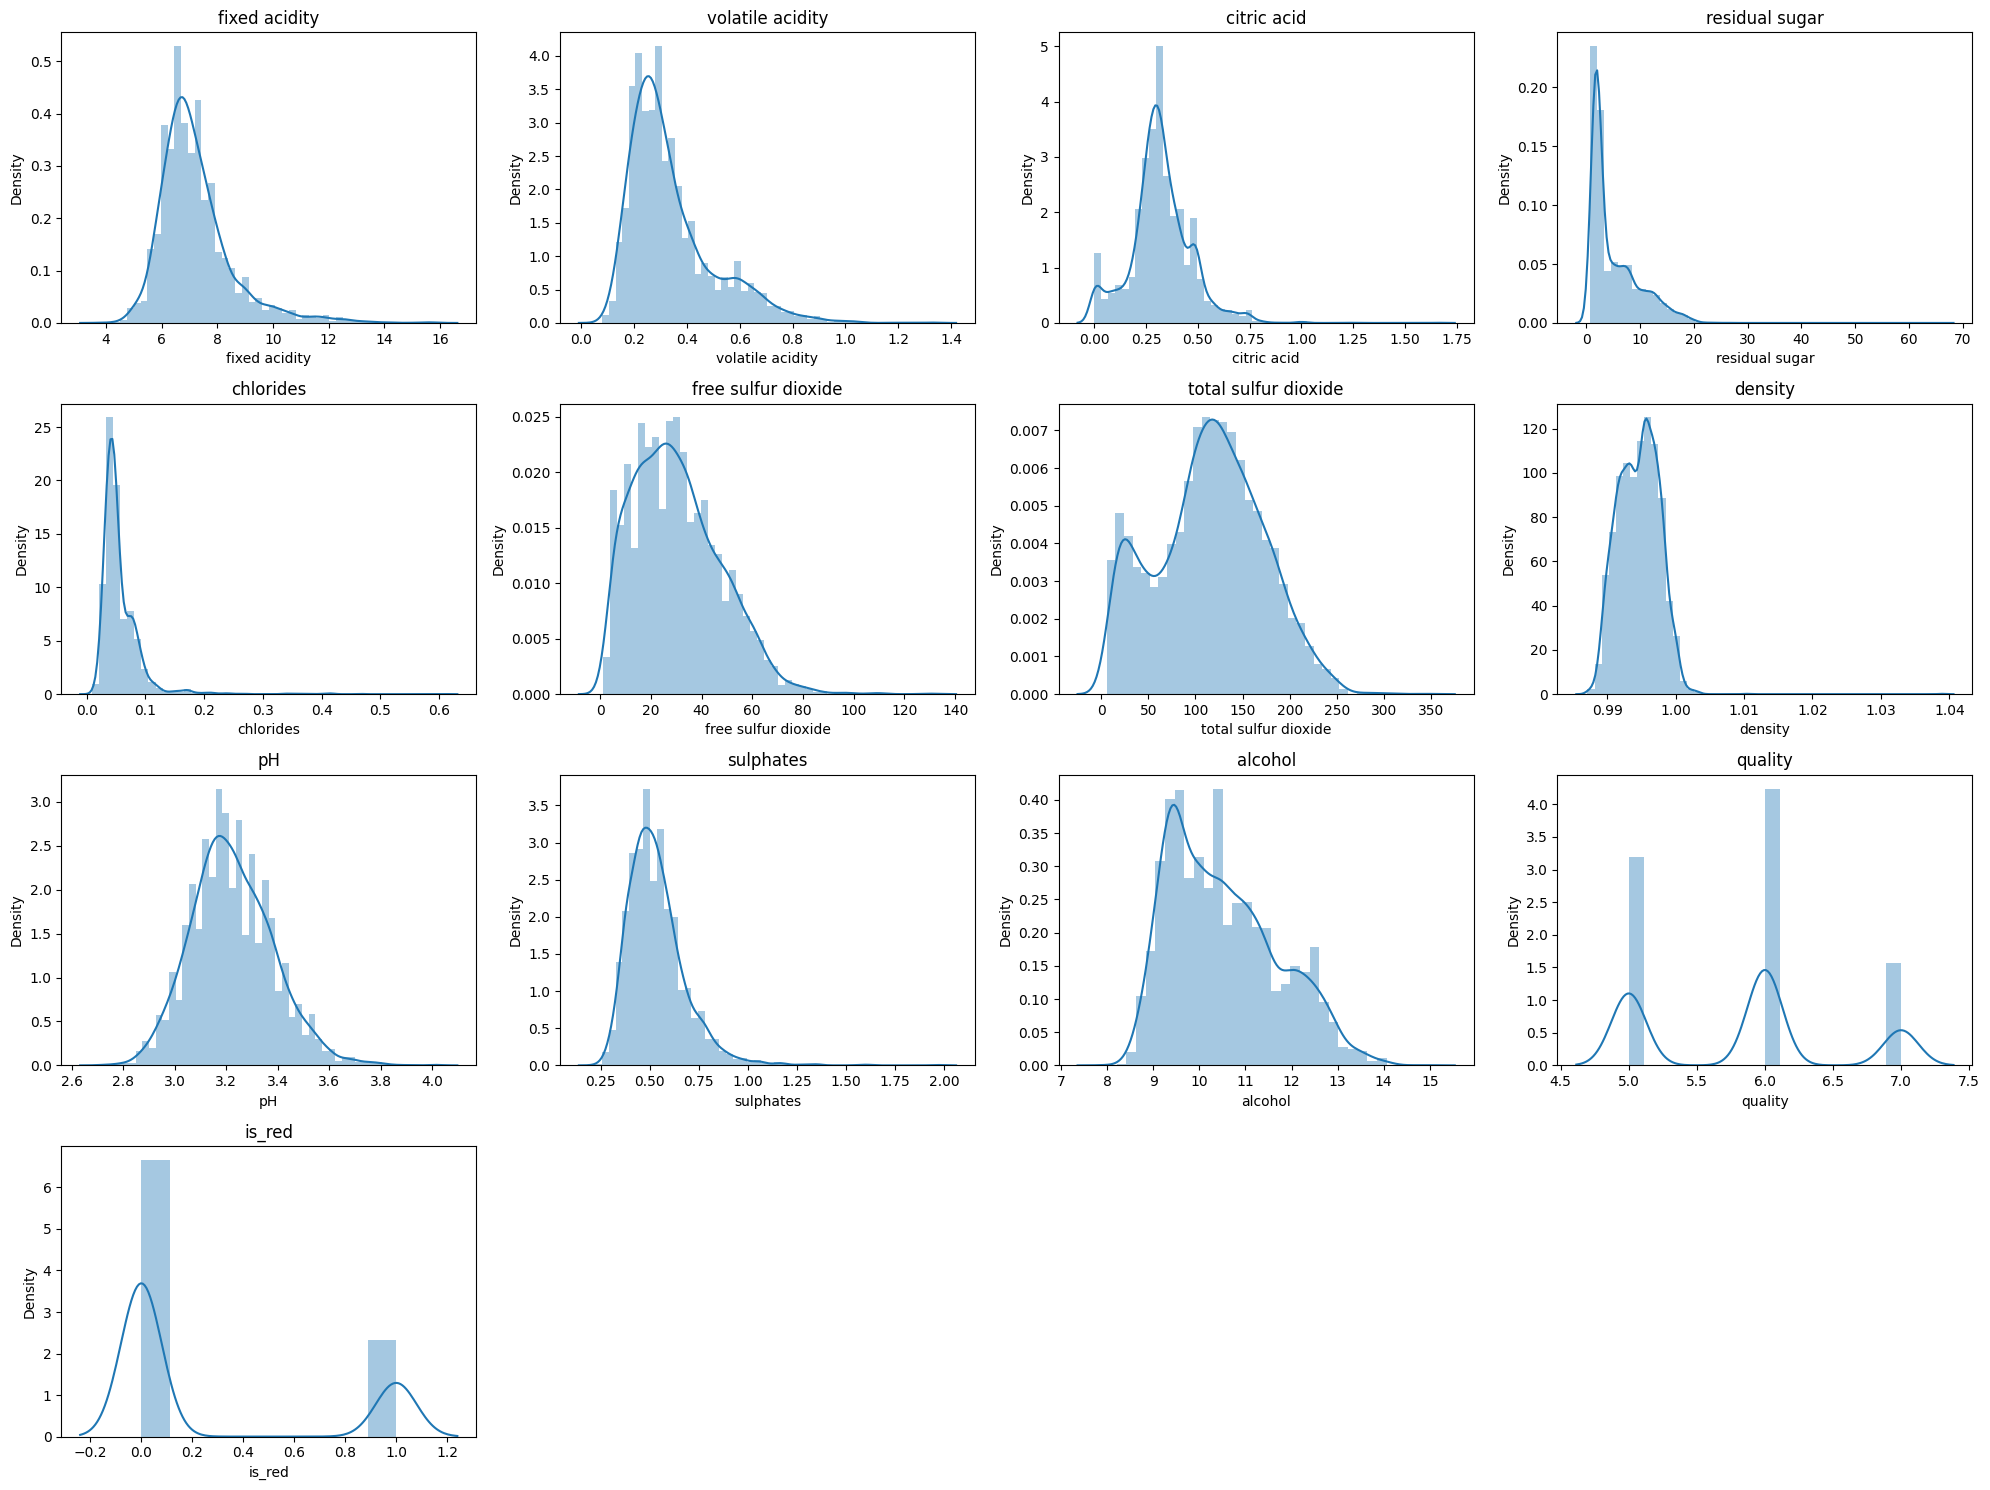

In [79]:
n=1
plt.figure(figsize=(20,15))
for i in numeric_features.columns:
  plt.subplot(4,4,n)
  n=n+1
  sns.distplot(df[i])
  plt.title(i)
  plt.tight_layout()

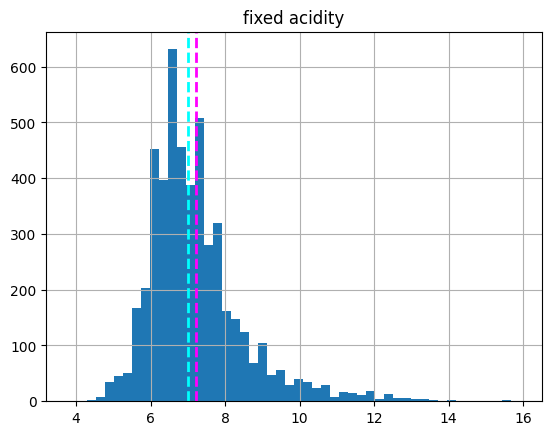

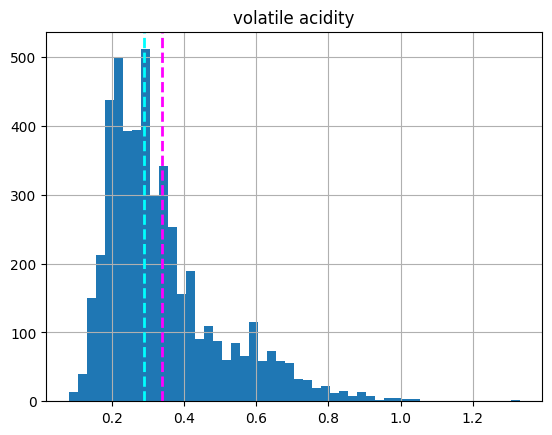

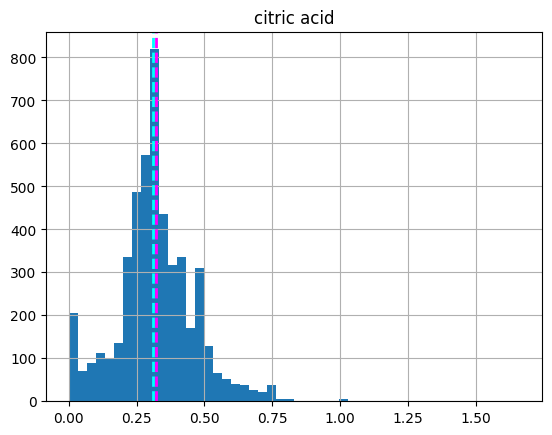

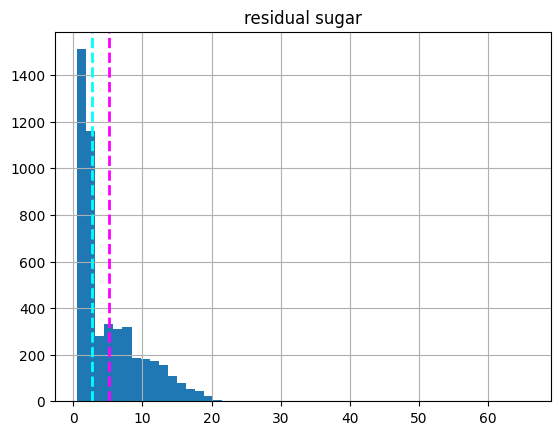

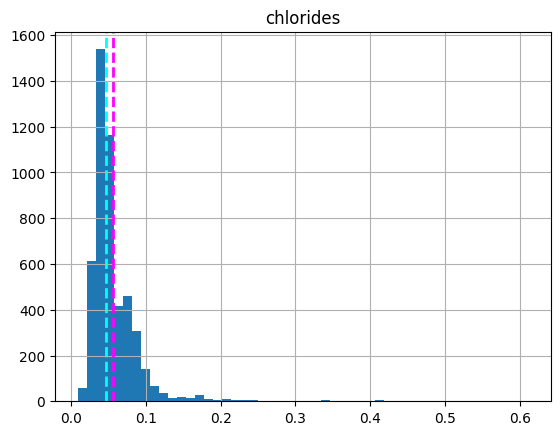

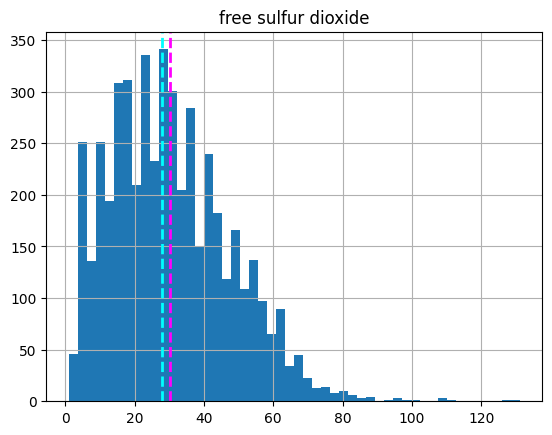

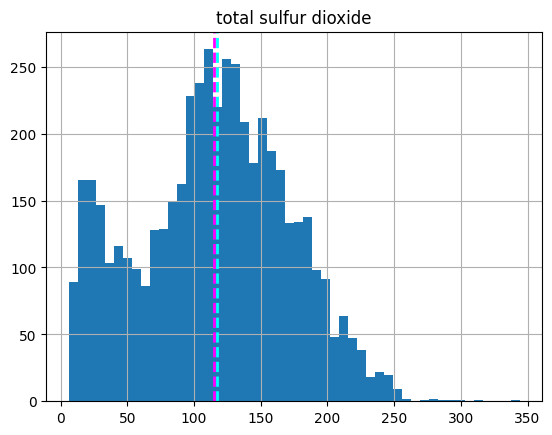

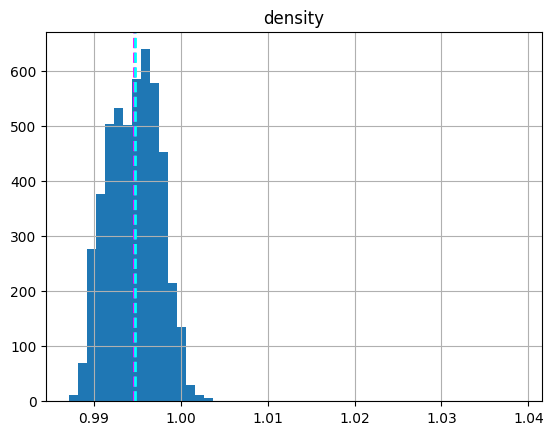

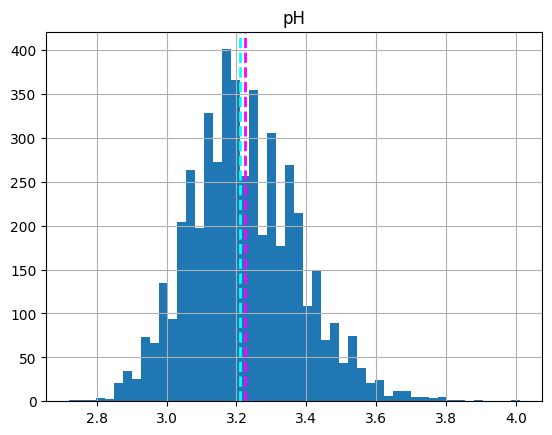

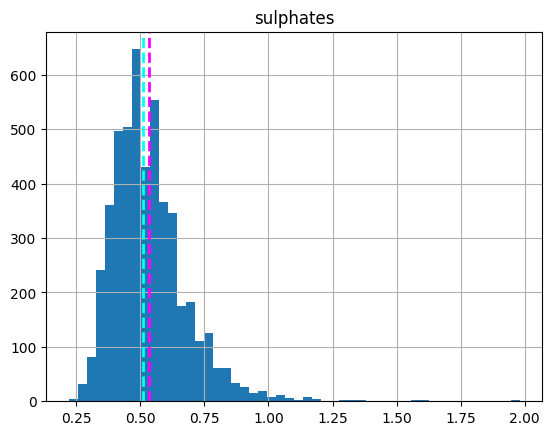

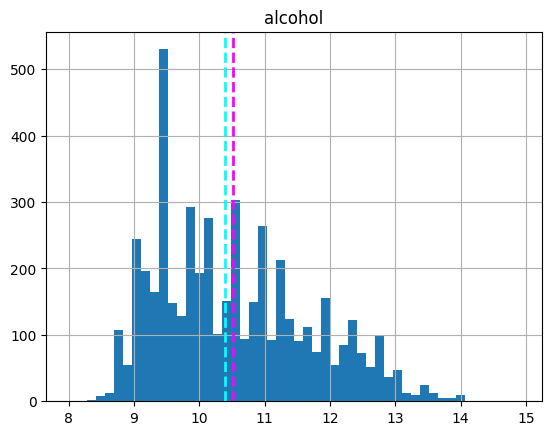

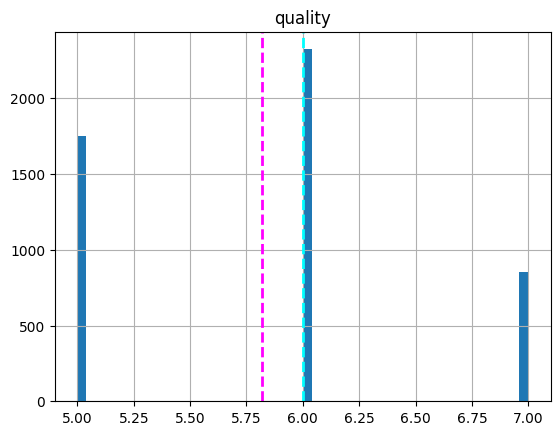

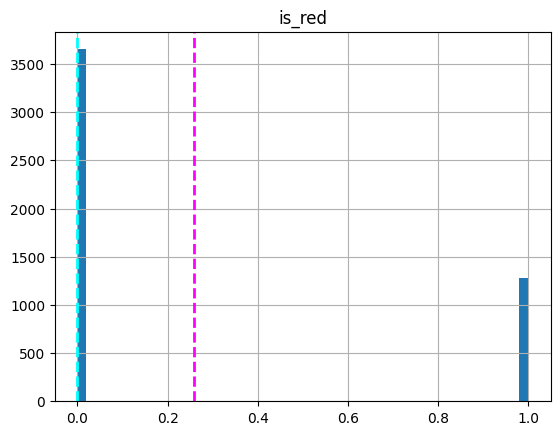

In [80]:
for col in numeric_features[:]:
  fig=plt.figure()
  ax=fig.gca()
  feature=df[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)

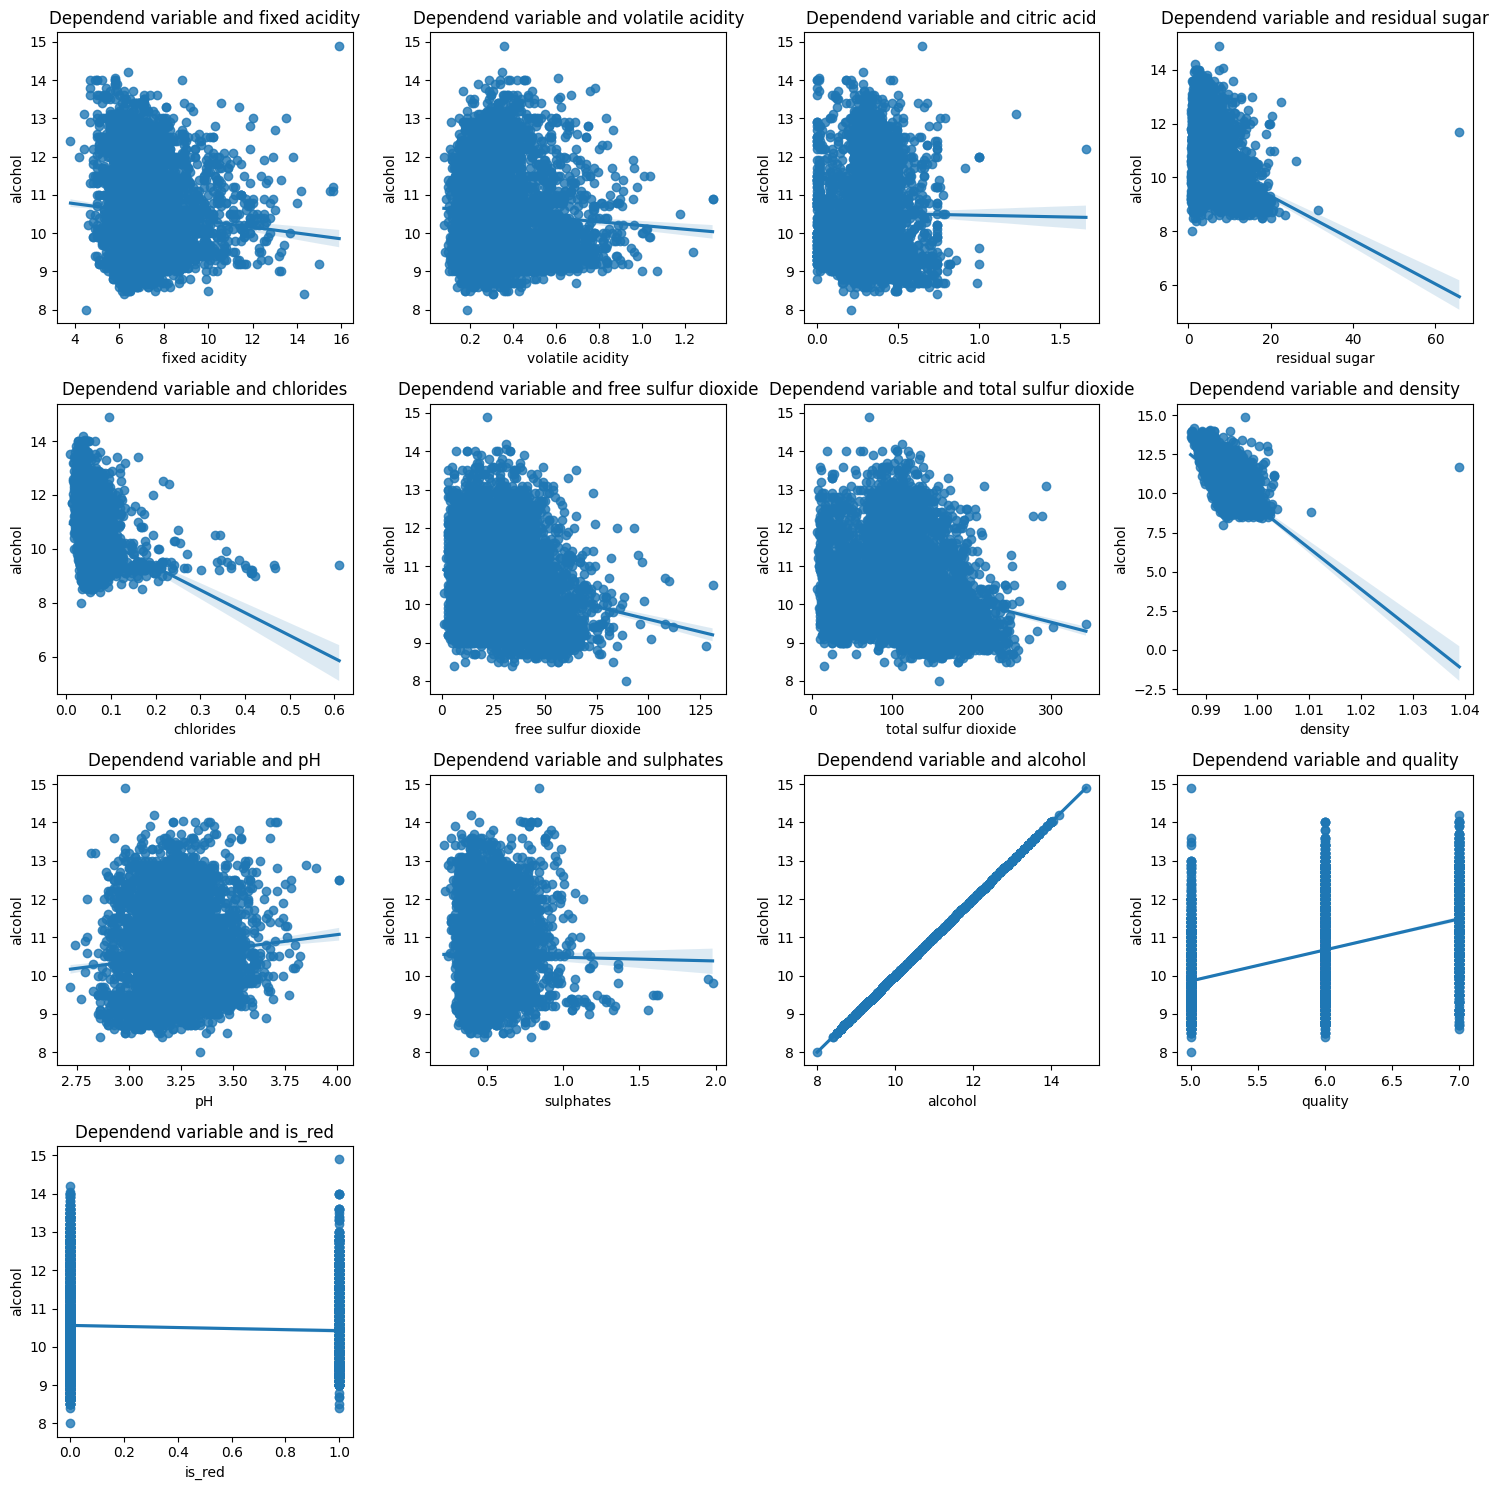

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df_numeric = df.select_dtypes(include=np.number)
n=1
plt.figure(figsize=(15,15))
numeric_cols_to_plot = [col for col in df_numeric.columns if col != 'cnt']
for i in numeric_cols_to_plot:
    plt.subplot(4,4,n)
    n+=1
    sns.regplot(x=df[i],y=df['alcohol'])
    df_numeric = df.select_dtypes(include=np.number)
    plt.title(f'Dependend variable and {i}')
    plt.tight_layout()

In [83]:
df_numeric = df.select_dtypes(include=np.number)
df_numeric.corr()['alcohol']

,alcohol
fixed acidity,-0.086292
volatile acidity,-0.067703
citric acid,-0.010286
residual sugar,-0.317209
chlorides,-0.262792
free sulfur dioxide,-0.191348
total sulfur dioxide,-0.257300
density,-0.662289
pH,0.095642
sulphates,-0.012206


<Axes: >

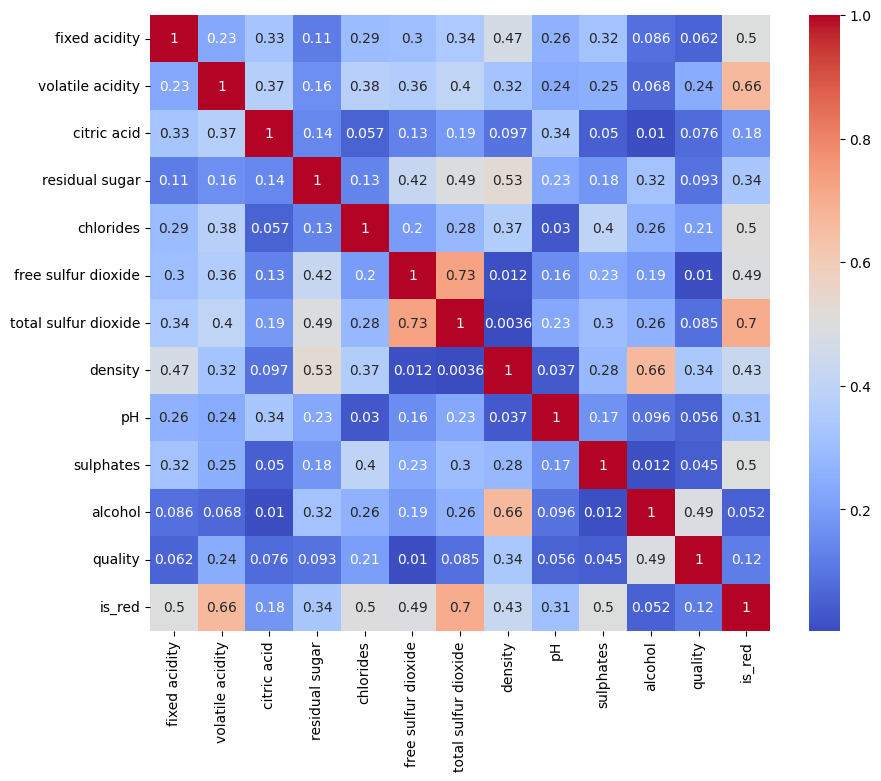

In [84]:
plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(abs(numeric_df.corr()), cmap='coolwarm', annot=True)

Text(0.5, 1.0, 'Square root')

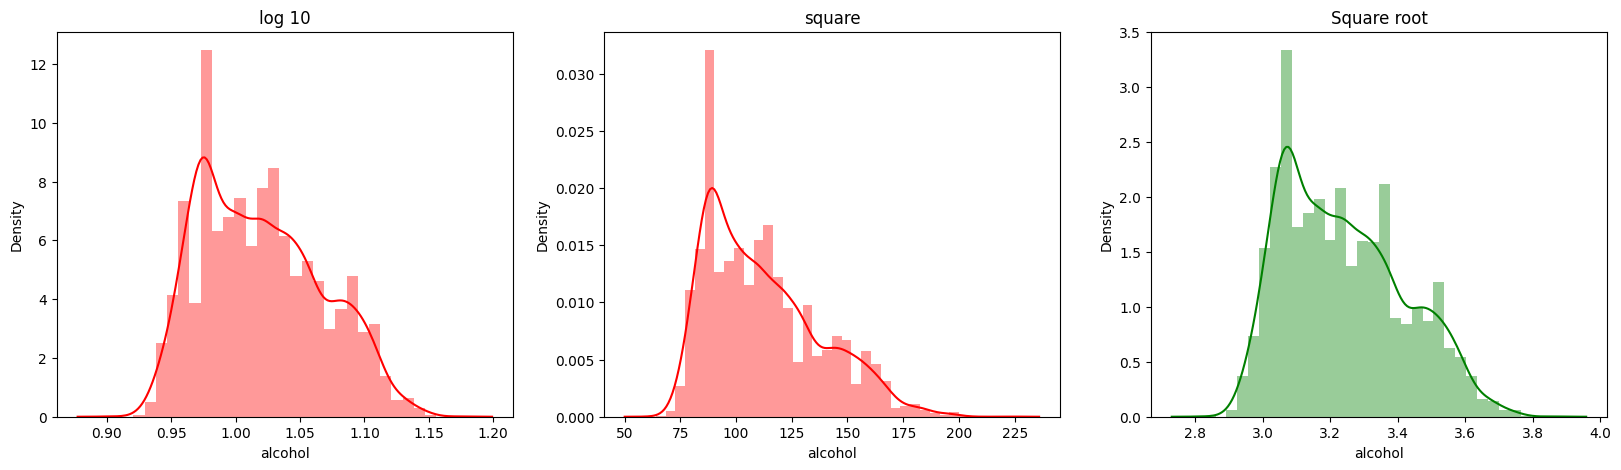

In [87]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.log10(df['alcohol']+0.0000001),ax=axes[0],color='red').set_title("log 10")
sns.distplot((df['alcohol']**2),ax=axes[1],color='red').set_title("square")
sns.distplot(np.sqrt(df['alcohol']),ax=axes[2], color='green').set_title("Square root")

In [88]:
X = df.drop(columns='alcohol')
y = np.sqrt(df['alcohol'])

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [90]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,is_red
4685,6.6,0.260,0.27,11.80,0.048,28.0,112.0,0.99606,2.87,0.49,6,0
2816,6.8,0.260,0.29,16.95,0.056,48.0,179.0,0.99980,3.45,0.40,5,0
2374,6.4,0.500,0.16,12.90,0.042,26.0,138.0,0.99740,3.28,0.33,5,0
724,9.3,0.655,0.26,2.00,0.096,5.0,35.0,0.99738,3.25,0.42,5,1
2503,6.6,0.160,0.30,1.60,0.034,15.0,78.0,0.99200,3.38,0.44,6,0


In [91]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,is_red
3061,7.9,0.35,0.36,1.6,0.038,11.0,124.0,0.99280,3.25,0.48,5,0
2996,8.1,0.26,0.30,7.8,0.049,39.0,152.0,0.99540,2.99,0.58,6,0
1738,5.9,0.15,0.31,5.8,0.041,53.0,155.0,0.99450,3.52,0.46,6,0
2824,6.8,0.27,0.32,1.5,0.044,19.0,142.0,0.99210,3.10,0.43,6,0
3365,6.6,0.26,0.27,1.5,0.040,19.0,114.0,0.99295,3.36,0.62,6,0


In [92]:
y_train.head()

,alcohol
4685,3.114482
2816,3.098387
2374,3.000000
724,3.098387
2503,3.346640


In [93]:
y_test.head()

,alcohol
3061,3.316625
2996,3.162278
1738,3.240370
2824,3.146427
3365,3.240370


In [94]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3698, 12), (1233, 12), (3698,), (1233,))

In [95]:
def score_metrics(actual,predicted):
  mae = mean_absolute_error(actual**2,predicted**2)
  print('mean absolute error is  :',mae)
  mse = mean_squared_error(actual**2,predicted**2)
  print('mean squared error is  :',mse)
  print('Root mean squared error is  :',np.sqrt(mse))
  print("R2 score is  :",r2_score(actual**2,predicted**2))


In [98]:
regression = LinearRegression()
# X_train = X_train.drop(columns=['alcohol'])
# X_test = X_test.drop(columns=['alcohol'])
regression.fit(X_train,y_train)

LinearRegression()

In [99]:
regression.score(X_train,y_train)

0.8093608933189794

In [100]:
reg_pred = regression.predict(X_test)

In [103]:
score_metrics(y_test,reg_pred)

mean absolute error is  : 0.34964098586333375
mean squared error is  : 0.21869746521374334
Root mean squared error is  : 0.4676510079255078
R2 score is  : 0.8351534846807529


In [104]:
 regression.coef_

array([ 7.72328226e-02,  1.08572036e-01,  6.94530180e-02,  3.44350008e-02,
       -1.65360314e-01, -5.20690408e-04, -1.12982477e-04, -9.59321415e+01,
        3.86379626e-01,  1.48803697e-01,  2.49105671e-02,  1.64796905e-01])

In [108]:
L1_pred = L1.predict(X_test)
score_metrics(y_test,L1_pred)

mean absolute error is  : 0.7345655320990931
mean squared error is  : 0.8773480089769131
Root mean squared error is  : 0.9366685694400732
R2 score is  : 0.3386856959646418


In [107]:
from sklearn.linear_model import Lasso

L1 = Lasso(alpha=0.001, max_iter=1000)
L1.fit(X_train,y_train)
L1.score(X_train,y_train)

0.38905893084323284

In [109]:
L1.coef_

array([-0.00833239,  0.0133202 ,  0.        , -0.00867471, -0.        ,
       -0.00022681, -0.00098335, -0.        ,  0.        , -0.        ,
        0.10388505, -0.1049597 ])

In [110]:
L1.intercept_

np.float64(2.881941666943704)

In [111]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014,0.01]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-08}

Using  {'alpha': 1e-08}  the negative mean squared error is:  -0.00659847585211514


In [113]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [0.1,1,10,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -0.028531136352969395


In [117]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
#lasso = Lasso()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
L2_regressor = GridSearchCV(Ridge(), parameters, scoring='neg_mean_squared_error', cv=5)
L2_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100, 0.5, 1.5, 1.6, 1.7, 1.8, 1.9]},
             scoring='neg_mean_squared_error')

In [118]:
print("The best fit alpha value is found out to be :" ,L2_regressor.best_params_)
print("\nUsing ",L2_regressor.best_params_, " the negative mean squared error is: ", L2_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -0.0065823259287750594


In [120]:
#regularisation improve the model
L2_pred = L2_regressor.predict(X_test)
score_metrics(y_test,L2_pred)

mean absolute error is  : 0.3522272793535875
mean squared error is  : 0.22066711755359453
Root mean squared error is  : 0.4697521873856412
R2 score is  : 0.8336688295006047


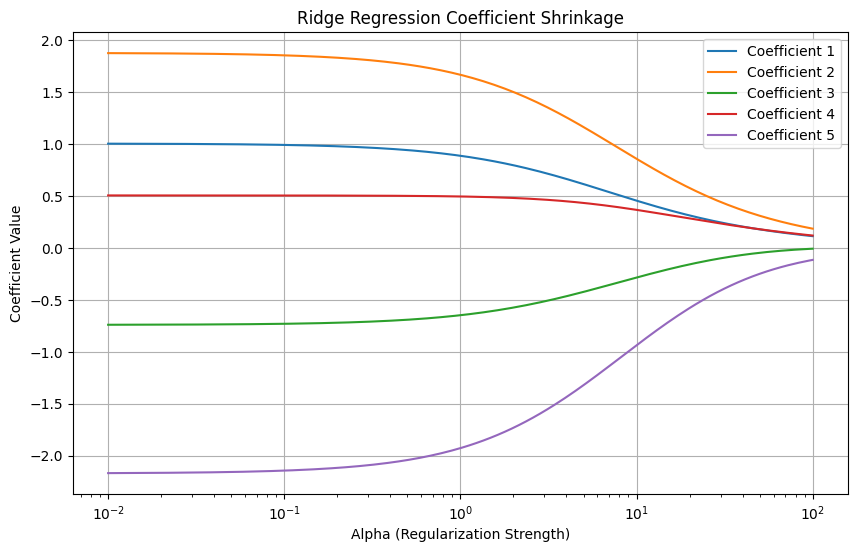

In [121]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# 1. Generate some synthetic data
np.random.seed(0)
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = X @ np.array([1, 2, -1, 0.5, -2]) + np.random.randn(100) * 0.5

# 2. Define a range of alpha (regularization strength) values
n_alphas = 200
alphas = np.logspace(-2, 2, n_alphas) # From 0.01 to 100 on a logarithmic scale

# 3. Initialize a list to store coefficients for each alpha
coefs = []

# 4. Fit Ridge regression for each alpha and store coefficients
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False) # fit_intercept=False for simplicity
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# 5. Convert coefficients to a NumPy array for easier plotting
coefs = np.array(coefs)

# 6. Plot the coefficient paths
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot each coefficient's path against alpha
for i in range(coefs.shape[1]):
    ax.plot(alphas, coefs[:, i], label=f'Coefficient {i+1}')

ax.set_xscale('log') # Set x-axis to logarithmic scale for better visualization of alpha
ax.set_xlabel('Alpha (Regularization Strength)')
ax.set_ylabel('Coefficient Value')
ax.set_title('Ridge Regression Coefficient Shrinkage')
ax.legend()
ax.grid(True)
plt.show()